In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
# Task 1.1: Leer el archivo CSV y almacenarlo en un array
headers = ["id", "date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]
data = np.genfromtxt('./data/kc_house_data.csv', delimiter=',', skip_header=1)
# Extraer la columna sqft_living y price para realizar la regresión lineal
X = data[:, 5].reshape(-1, 1)
y = data[:, 2].reshape(-1, 1)

In [4]:
# Task 1.2: Ajustar un modelo polinomial en base al juego de datos
# Definir el grado máximo del polinomio
max_degree = 10
# Crear una matriz X_poly que contenga las características polinomiales
X_poly = np.ones((X.shape[0], 1))
for degree in range(1, max_degree+1):
    X_poly = np.concatenate((X_poly, np.power(X, degree)), axis=1)
# Crear una instancia de LinearRegression y ajustar el modelo
theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)


LinearRegression()

In [5]:
# Task 1.3: Implementar el algoritmo de regresión lineal con descenso del gradiente
# Definir la tasa de aprendizaje y el número máximo de iteraciones
alpha = 0.0000001
max_iters = 10000
# Inicializar los parámetros con valores aleatorios
theta_gd = np.random.rand(X_poly.shape[1], 1)
# Implementar el descenso del gradiente
for i in range(max_iters):
    h = X_poly.dot(theta_gd)
    error = h - y
    gradient = X_poly.T.dot(error)
    theta_gd = theta_gd - alpha * gradient

C:\Users\rebec\AppData\Local\Temp\ipykernel_20908\727609764.py:12: RuntimeWarning: invalid value encountered in subtract
  theta = theta - alpha * gradient


In [6]:
# Task 1.4: Usar cross-validation para encontrar el grado del polinomio que mejor describe los datos
degrees = range(1, 20)
mse_scores = []
for degree in degrees:
    # Crear una matriz X_poly que contenga las características polinomiales
    X_poly_cv = np.ones((X.shape[0], 1))
    for i in range(1, degree+1):
        X_poly_cv = np.concatenate((X_poly_cv, np.power(X, i)), axis=1)
    # Calcular el MSE utilizando validación cruzada con 5 particiones
    mse = 0
    for j in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X_poly_cv, y, test_size=0.2)
        theta_cv = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
        h_cv = X_test.dot(theta_cv)
        mse += np.mean((h_cv - y_test)**2)
    mse_scores.append(mse/5)
best_degree = degrees[np.argmin(mse_scores)]

El mejor grado del polinomio es: 6


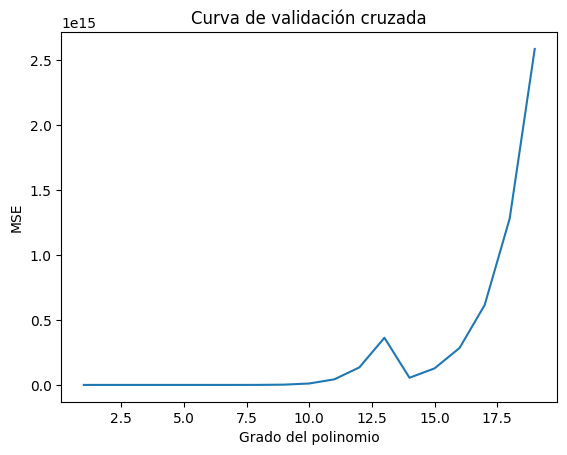

In [7]:
# Task 1.5: Realizar un análisis de los hallazgos
plt.plot(degrees, mse_scores)
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE')
plt.title('Curva de validación cruzada')
plt.show()